# AM 115 Project \#1

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 1. SIR, A First Approach

### Parameters Involved

In [2]:
# Defining the differential equations of the model
def deriv(t, vals, gamma, beta):
    # Get values of populations S, I, R and total population
    S, I, R = vals
    N = S + I + R
    
    # Find value of derivative
    dS_dt = -gamma / N * I * S
    dI_dt = gamma / N * I * S - beta * I
    dR_dt = beta * I
    
    return dS_dt, dI_dt, dR_dt

In [12]:
# Defining values for parameters
# beta = np.log(2)
# gamma = 2 * beta

beta = np.log(2)
gamma = 2 * beta

# Initial values of (S, I, R) and time information
y0 = (999, 1, 0)
t = [0, 20]
t_eval = np.linspace(t[0], t[1], 100)

# Solve the system of differential equations
sol = solve_ivp(deriv, t, y0, args=(gamma, beta), t_eval=t_eval)

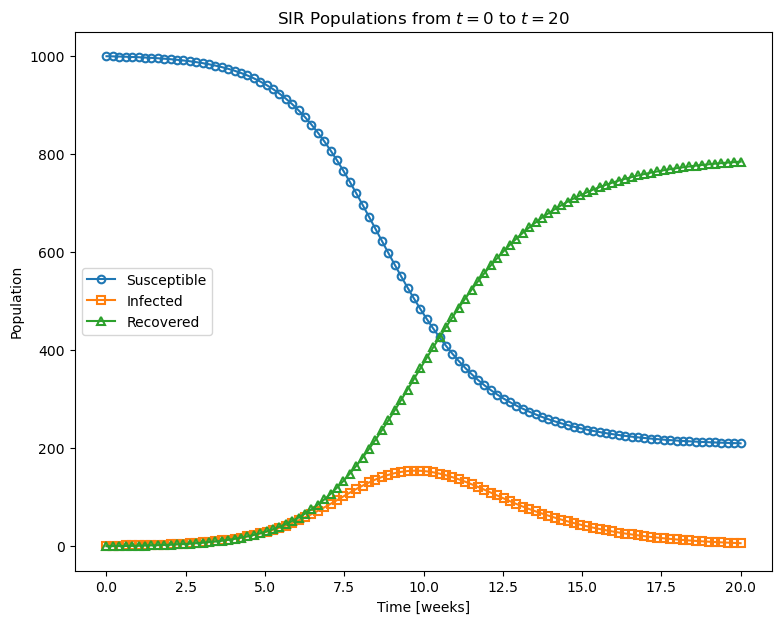

In [13]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(sol.t, sol.y[0], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='Susceptible')
ax.plot(sol.t, sol.y[1], '-s', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='Infected')
ax.plot(sol.t, sol.y[2], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='Recovered')

# Set axes labels and legends
ax.set_xlabel('Time [weeks]')
ax.set_ylabel('Population')
ax.set_title(f"SIR Populations from $t = {t[0]}$ to $t = {t[1]}$")
ax.legend(loc='center left')

plt.show()

## 2. SIR with Vaccination

We introduce vaccination into our model through a vaccination rate, $v(t),$ representing how many people are vaccinated per unit time, where the timescale is set by the $\lambda$ parameter. The rate $v(t)$ is a function of time since we assume vaccination does not occur at the start of the disease spread, and its specific time dependence is something to explore in the model. As a first, naive approach, we will assume that any vaccinated individual goes from susceptible to recovered; i.e. we assume a 100% efficacy of the vaccine, whereby  vaccinated individuals cannot get infected.

$$
    \frac{dS}{dt} = -\frac{\gamma}{N} IS - v(t) S \\
    \frac{dI}{dt} = \frac{\gamma}{N} IS - \lambda I \\
    \frac{dR}{dt} = \lambda I + v(t)S
$$

For our first tackle at the problem, we will assume that the time dependence of the vaccination term is the simplest possible; specifically, we assume vaccination happens at a constant rate, independent of time, after a vaccine has been developed, which occurs at some time $t_{\text{start}}.$ Formally, the vaccination rate is then a piecewise function,

$$ 
    v(t) = \begin{cases}
      0, & \text{if}\ t < t_{\text{start}}, \\
      v_0, & \text{otherwise},
    \end{cases}
$$

where $v_0$ is the constant vaccination rate per unit time that the model assumes.

In [5]:
# Defining the differential equations of the model
def deriv2(t, vals, gamma, beta, v_func):
    # Get values of populations S, I, R and total population
    S, I, R = vals
    N = S + I + R
    
    # Find value of derivative
    v = v_func(t)
    dS_dt = -gamma / N * I * S - v * S
    dI_dt = gamma / N * I * S - beta * I
    dR_dt = beta * I + v * S
    
    return dS_dt, dI_dt, dR_dt 

In [6]:
# Defining values for parameters
beta = np.log(2)
gamma = 2 * beta
v0 = np.log(2) / 2
t_start = 7
v_func = lambda t: v0 if t > t_start else 0

# Initial values of (S, I, R) and time information
y0 = (999, 1, 0)
t = [0, 20]
t_eval = np.linspace(t[0], t[1], 100)

# Solve the system of differential equations
sol = solve_ivp(deriv2, t, y0, args=(gamma, beta, v_func), t_eval=t_eval)

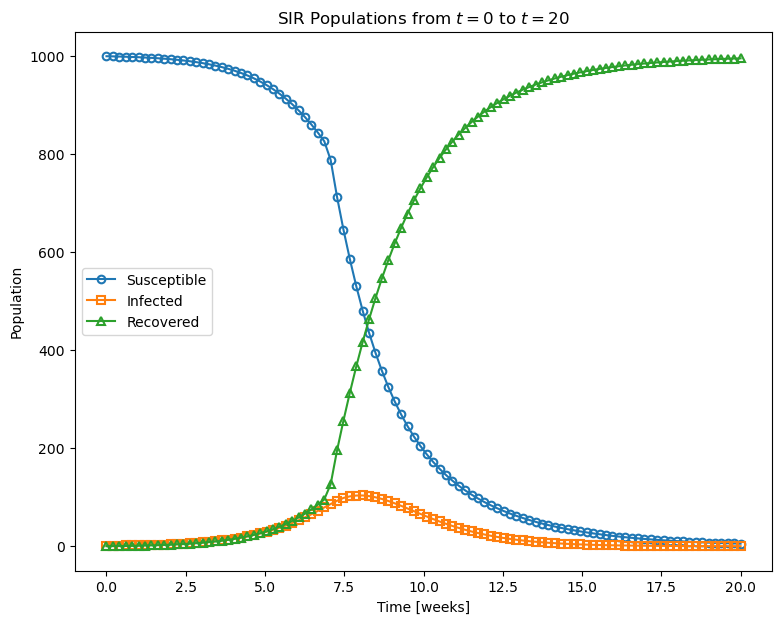

In [7]:
# Plot solution
fig, ax = plt.subplots(1, 1, figsize=(9,7))

ax.plot(sol.t, sol.y[0], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='Susceptible')
ax.plot(sol.t, sol.y[1], '-s', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='Infected')
ax.plot(sol.t, sol.y[2], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='Recovered')

# Set axes labels and legends
ax.set_xlabel('Time [weeks]')
ax.set_ylabel('Population')
ax.set_title(f"SIR Populations from $t = {t[0]}$ to $t = {t[1]}$")
ax.legend(loc='center left')

plt.show()

We can start to see the effect of vaccines! The infected population does not grow as much and the recovered population, which includes both people who overcame the disease and vaccinated individuals, grows faster than before.

### Varying the Vaccination Rate $v_0$

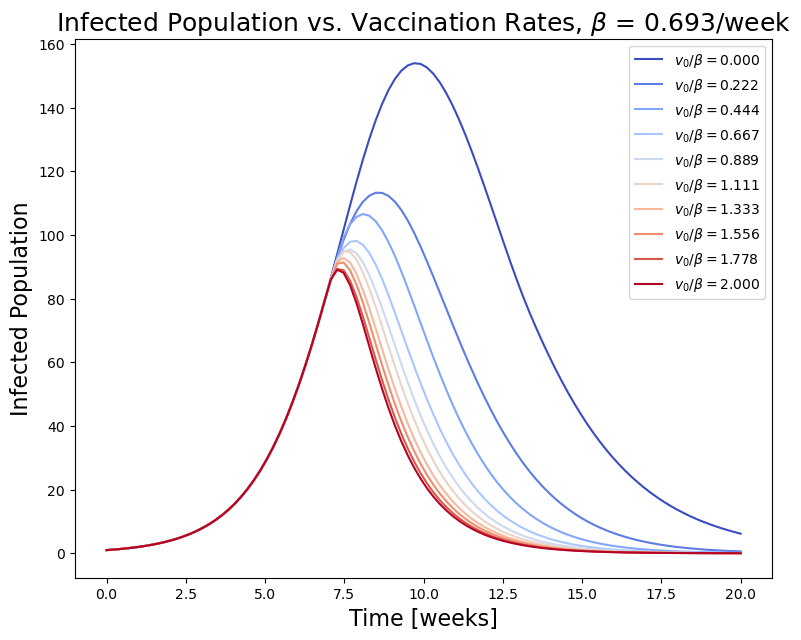

In [8]:
# Defining values for parameters
beta = np.log(2)
gamma = 2 * beta
t_start = 7

# Initial values of (S, I, R) and time information
y0 = (999, 1, 0)
t = [0, 20]
t_eval = np.linspace(t[0], t[1], 100)

# Array with different vaccination rates
n_rates = 10
v0_arr = np.linspace(0, 2, n_rates) * beta

# Figure in which to plot
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
colors = plt.cm.coolwarm(np.linspace(0, 1, n_rates))

for i, v0 in enumerate(v0_arr):
    # Set vaccination rate function given v0
    v_func = lambda t: v0 if t > t_start else 0
    # Solve the system of differential equations
    sol = solve_ivp(deriv2, t, y0, args=(gamma, beta, v_func), t_eval=t_eval)
    ax.plot(sol.t, sol.y[1], color=colors[i], label=f"$v_0 / \\beta = {v0 / beta:.3f}$")

# Set axes labels and legends
ax.set_xlabel("Time [weeks]", fontsize=16)
ax.set_ylabel("Infected Population", fontsize=16)
ax.set_title(f"Infected Population vs. Vaccination Rates, $\\beta$ = {beta:.3f}/week", fontsize=18)
ax.legend()
plt.show()